In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [50]:
df_Tree = pd.read_csv('Cleaned Data Tree.csv')
df_Tree_ID = df_Tree.set_index('Customer_ID')

In [52]:
X = df_Tree_ID.drop(['churn'],axis=1)
X

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,months,new_cell,numbcars,ownrent,phones,prizm_social_one,refurb_new,rv,truck,uniqsubs
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1000001,3373,999,958,1,0,0,0,0,0,1914,...,54,1,3,0,1,2,0,0,0,1
1000003,1819,51,566,0,0,0,0,0,0,2604,...,51,2,2,0,1,2,0,0,0,0
1000004,7881,37,2408,0,0,0,0,0,0,2620,...,53,2,1,2,0,3,0,0,0,0
1000005,14097,2480,4930,0,0,0,0,0,0,2826,...,50,2,1,1,5,4,0,0,0,0
1000007,1852,0,566,0,0,0,0,0,0,2629,...,46,0,0,0,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099977,5529,304,566,0,223,2651,1383,0,0,2433,...,23,1,2,0,0,0,0,0,0,0
1099982,6708,32,3108,0,0,0,0,0,0,2592,...,23,1,0,0,2,2,0,0,0,0
1099985,22331,3488,5422,0,6,57,0,25,54,2629,...,20,1,2,2,2,5,0,0,0,2


In [57]:
y = pd.DataFrame(df_Tree_ID['churn'])
y

,churn
Customer_ID,
1000001,1
1000003,1
1000004,0
1000005,0
1000007,1
...,...
1099977,0
1099982,1
1099985,1


In [58]:
import xgboost as xgb

clf_xgb = xgb.XGBClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

eval_set = [(X_train, y_train), (X_test, y_test)]

clf_xgb.fit(X_train, y_train, eval_metric=["error", "auc"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.39161	validation_0-auc:0.65428	validation_1-error:0.40048	validation_1-auc:0.64005
[1]	validation_0-error:0.38372	validation_0-auc:0.66725	validation_1-error:0.39668	validation_1-auc:0.64794
[2]	validation_0-error:0.37966	validation_0-auc:0.67478	validation_1-error:0.39455	validation_1-auc:0.65242
[3]	validation_0-error:0.37171	validation_0-auc:0.68561	validation_1-error:0.39126	validation_1-auc:0.66089
[4]	validation_0-error:0.36594	validation_0-auc:0.69153	validation_1-error:0.38527	validation_1-auc:0.66475
[5]	validation_0-error:0.36222	validation_0-auc:0.69768	validation_1-error:0.38231	validation_1-auc:0.66759
[6]	validation_0-error:0.35821	validation_0-auc:0.70341	validation_1-error:0.38122	validation_1-auc:0.67099
[7]	validation_0-error:0.35608	validation_0-auc:0.70680	validation_1-error:0.38051	validation_1-auc:0.67336
[8]	validation_0-error:0.35193	validation_0-auc:0.71195	validation_1-error:0.37941	validation_1-auc:0.67511
[9]	validation_0-error:0.346

[76]	validation_0-error:0.25134	validation_0-auc:0.83242	validation_1-error:0.36666	validation_1-auc:0.68809
[77]	validation_0-error:0.25082	validation_0-auc:0.83324	validation_1-error:0.36711	validation_1-auc:0.68820
[78]	validation_0-error:0.24958	validation_0-auc:0.83438	validation_1-error:0.36692	validation_1-auc:0.68812
[79]	validation_0-error:0.24816	validation_0-auc:0.83570	validation_1-error:0.36724	validation_1-auc:0.68831
[80]	validation_0-error:0.24816	validation_0-auc:0.83582	validation_1-error:0.36743	validation_1-auc:0.68830
[81]	validation_0-error:0.24678	validation_0-auc:0.83715	validation_1-error:0.36801	validation_1-auc:0.68745
[82]	validation_0-error:0.24594	validation_0-auc:0.83845	validation_1-error:0.36801	validation_1-auc:0.68715
[83]	validation_0-error:0.24536	validation_0-auc:0.83886	validation_1-error:0.36866	validation_1-auc:0.68701
[84]	validation_0-error:0.24512	validation_0-auc:0.83913	validation_1-error:0.36866	validation_1-auc:0.68683
[85]	validation_0-e

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy: 62.95%


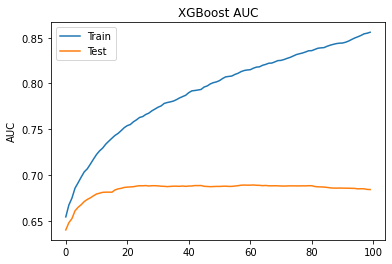

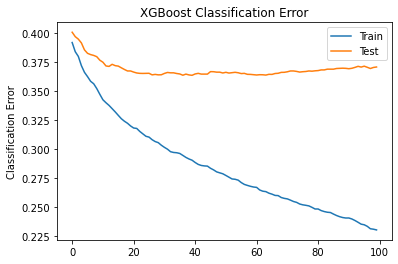

In [59]:
# make predictions for test data
y_pred = clf_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# retrieve performance metrics
results = clf_xgb.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

From the above graphs we infer that model learns really well until 20th iteration but then Test scores become constant

### Let plot the feature importance

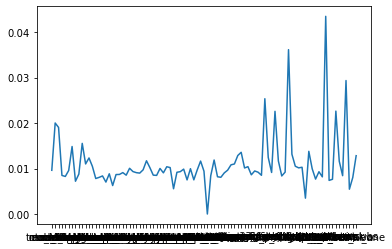

In [68]:
#feature importance
plt.plot(X.columns, clf_xgb.feature_importances_)

In [60]:
# feature importance
#print(clf_xgb.feature_importances_)
# plot
#from matplotlib import pyplot

def get_xgb_imp(xgb, feat_names):
    from numpy import array
    imp_vals = xgb.feature_importances_
    imp_dict = {feat_names[i]:float(imp_vals.get('f'+str(i),0.)) for i in range(len(feat_names))}
    total = array(imp_dict.values()).sum()
    return {k:v/total for k,v in imp_dict.items()}

get_xgb_imp(xgb=clf_xgb,feat_names=X.columns)

#plt.figure(figsize=(50,10))
#pyplot.bar(range(len(clf_xgb.feature_importances_)), clf_xgb.feature_importances_, label=clf_xgb.feature_names)
#pyplot.show()

AttributeError: 'numpy.ndarray' object has no attribute 'get'

<Figure size 2880x1440 with 0 Axes>

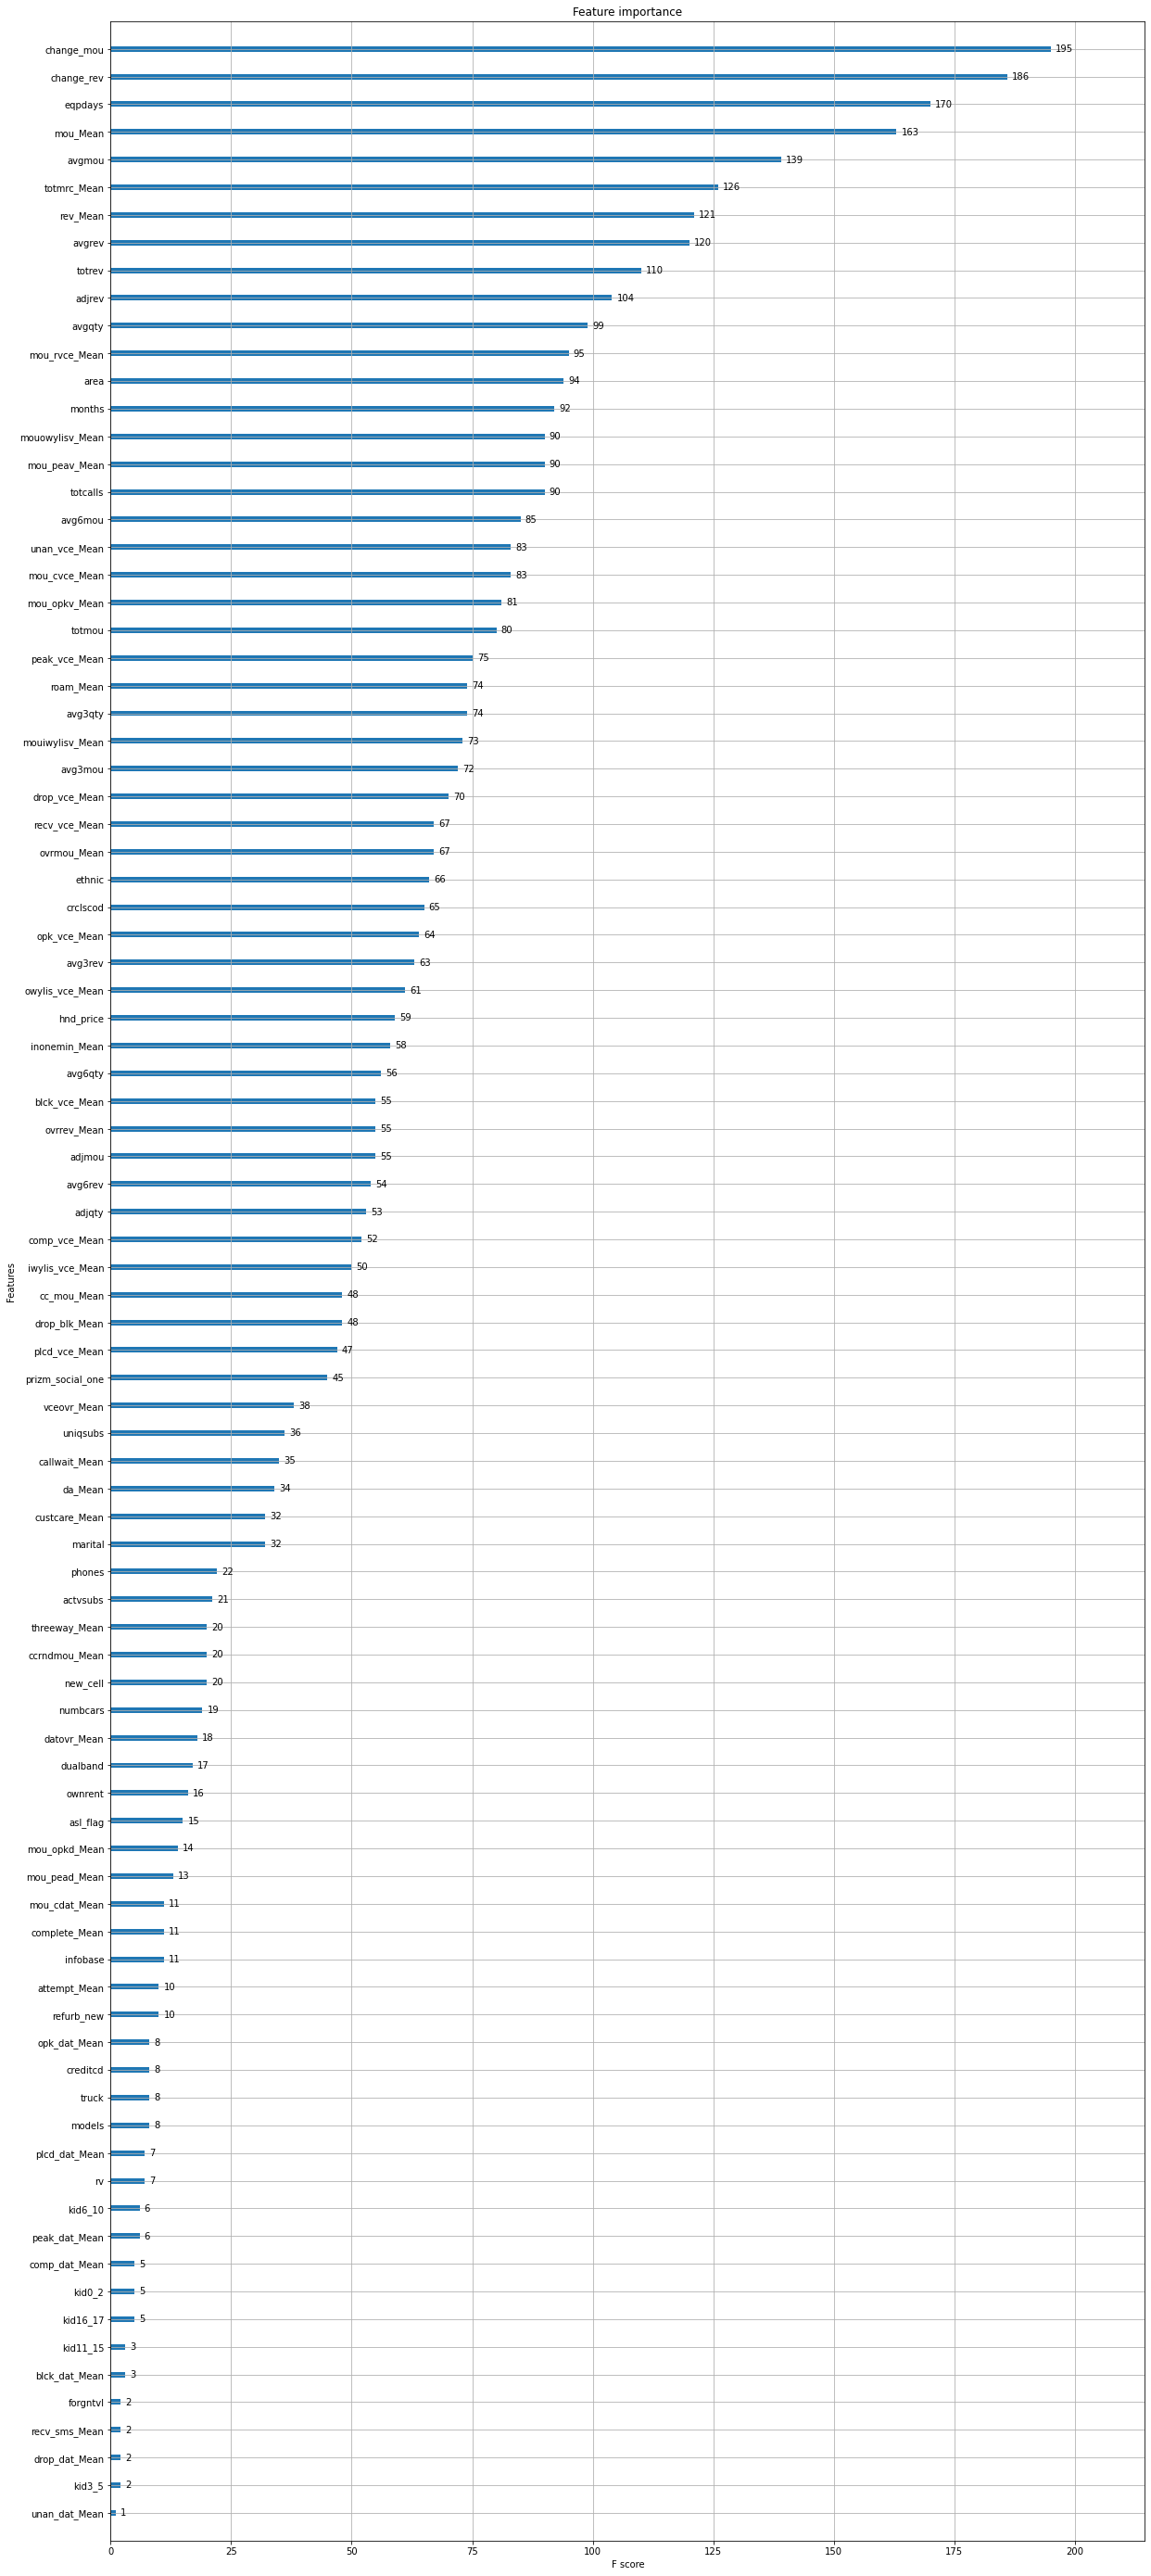

In [78]:
# plot feature importance
from xgboost import plot_importance
plt.figure(figsize=(40,20))
plot_importance(clf_xgb,max_num_features=100)
#plt.savefig('Feature Importances',dpi=1200)
plt.rcParams["figure.figsize"] = (20,50)
plt.show()

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

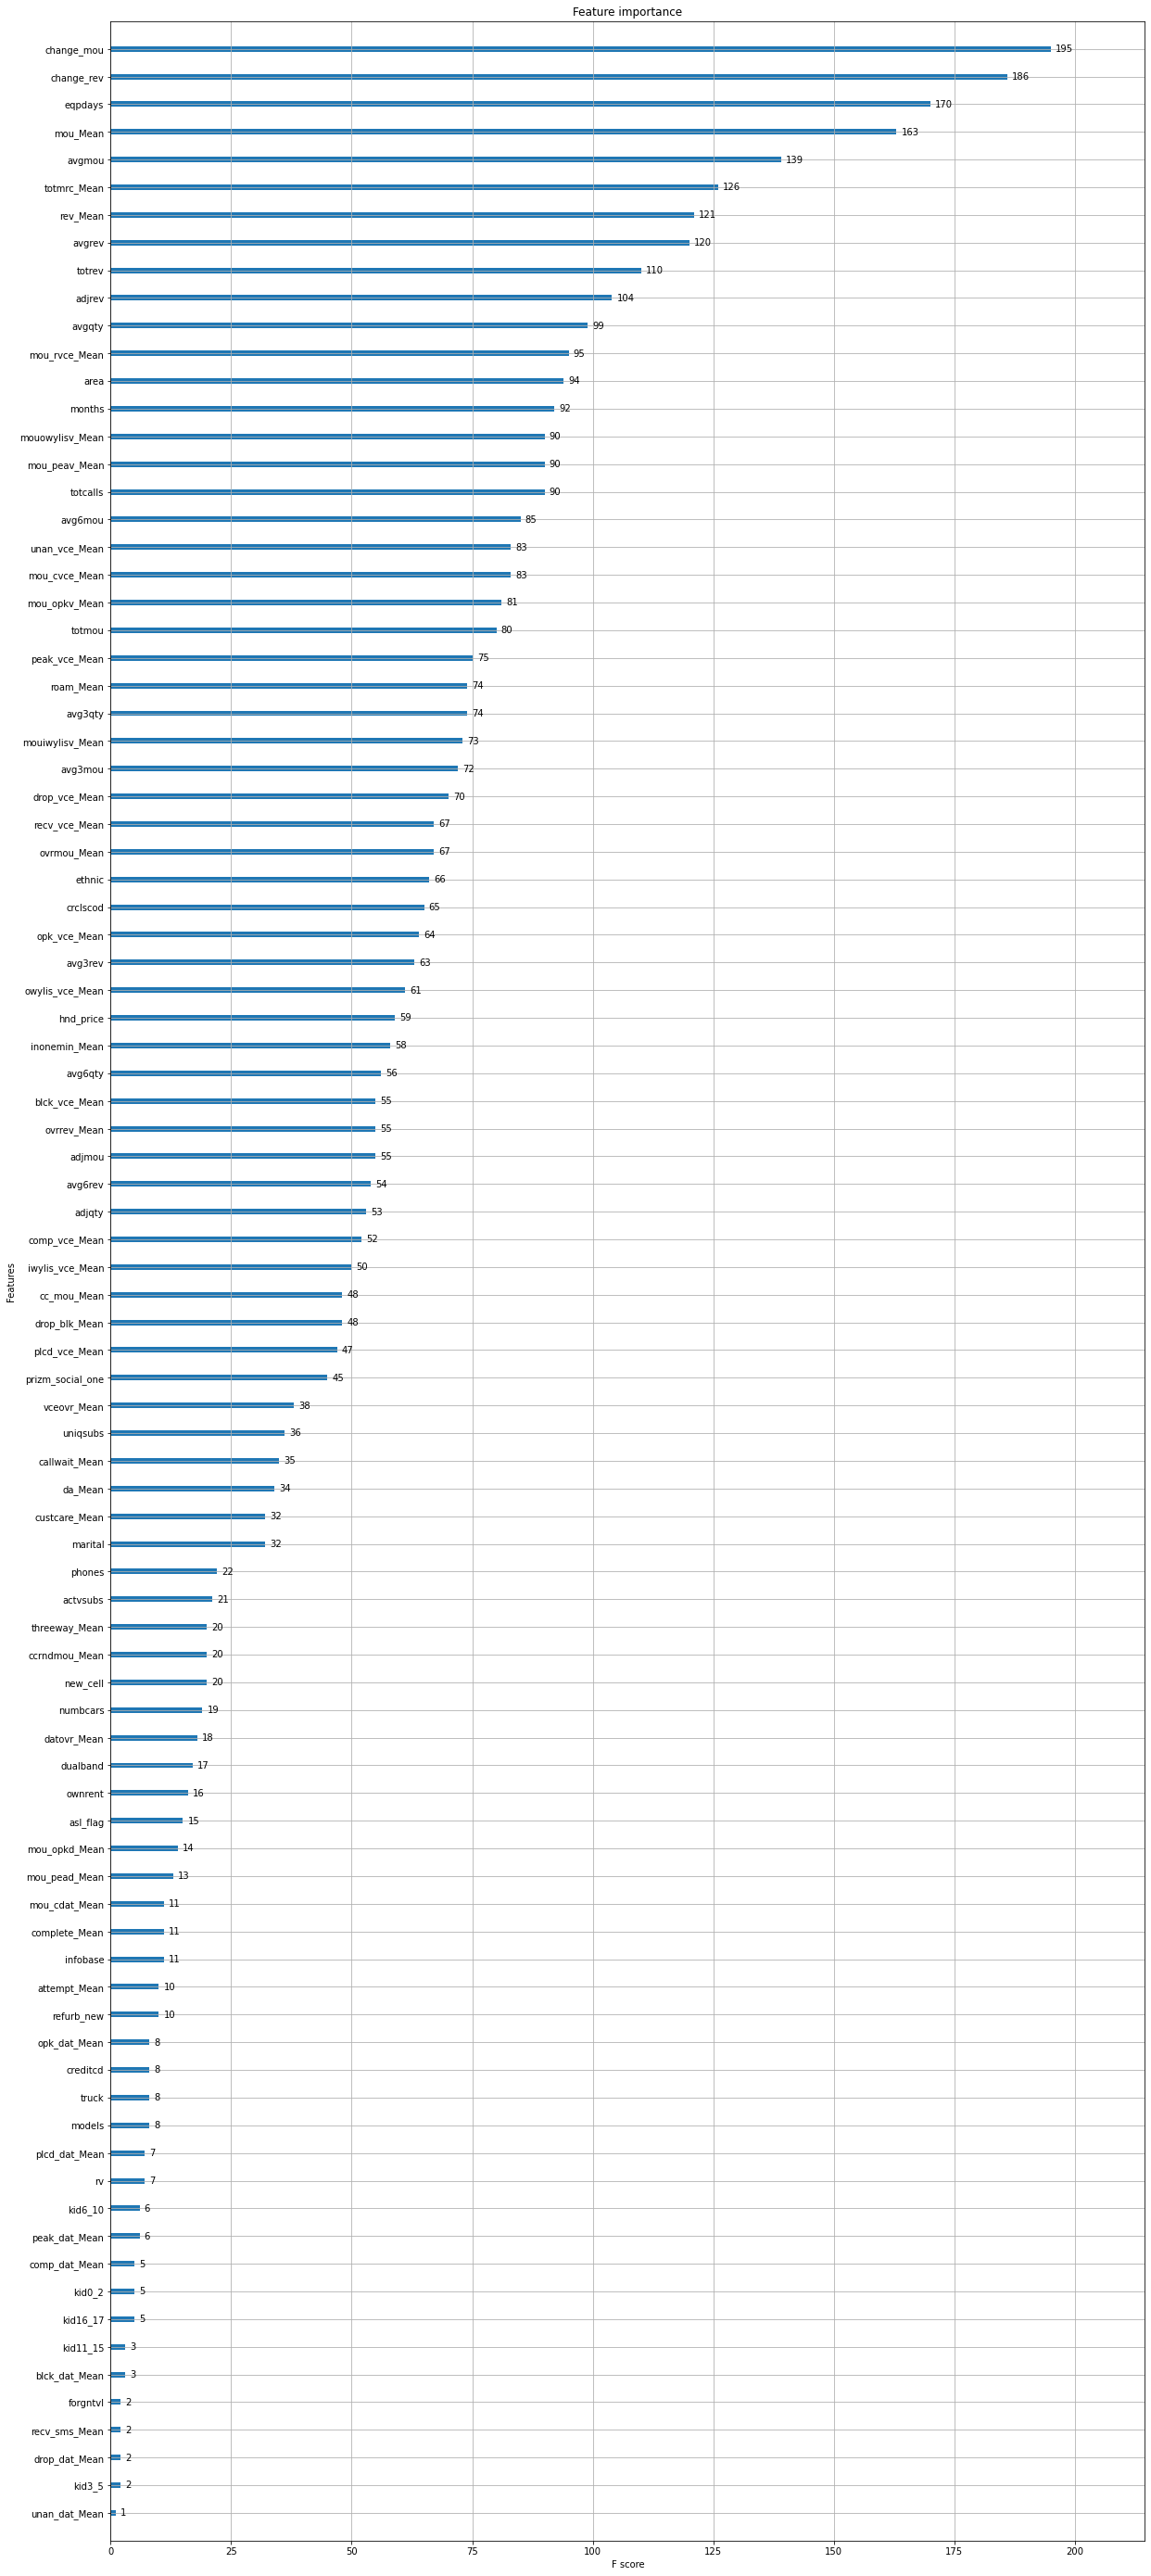

In [80]:
# create dict to use later
myfeatures = X_train.columns
dict_features = dict(enumerate(myfeatures))

# feat importance with names f1,f2,...
axsub = xgb.plot_importance(final_gb )

# get the original names back
Text_yticklabels = list(axsub.get_yticklabels())
dict_features = dict(enumerate(myfeatures))
lst_yticklabels = [ Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
lst_yticklabels = [ dict_features[int(i)] for i in lst_yticklabels]

axsub.set_yticklabels(lst_yticklabels)
print(dict_features)
plt.show()